# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### My Answers:
- I would define the most profitable item as the one that generates the most profit, meaning that it's (bottle retail price - bottle cost) * bottles sold. This purely considers how much money the bottle generates and not other factors, like volume, though attributes like that might afect how many bottles are sold. 
- See my use of .groupby below.
- See my plot below.

In [80]:
df = pd.read_csv('./data/iowa.csv')
df['Profit'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']

# Using groupby
profits = df.groupby(['Category Name'])['Profit'].sum()
profits_sorted = profits.sort_values(ascending=False)

top10 = profits_sorted[:10]

# Printing top 10 most porfitable liquors
print(top10)

Category Name
CANADIAN WHISKIES            921317.22
AMERICAN VODKAS              878724.32
STRAIGHT BOURBON WHISKIES    534492.37
SPICED RUM                   472589.23
WHISKEY LIQUEUR              420905.32
IMPORTED VODKAS              357161.56
TENNESSEE WHISKIES           311914.93
100% AGAVE TEQUILA           311646.67
VODKA 80 PROOF               252180.75
BLENDED WHISKIES             207038.50
Name: Profit, dtype: float64


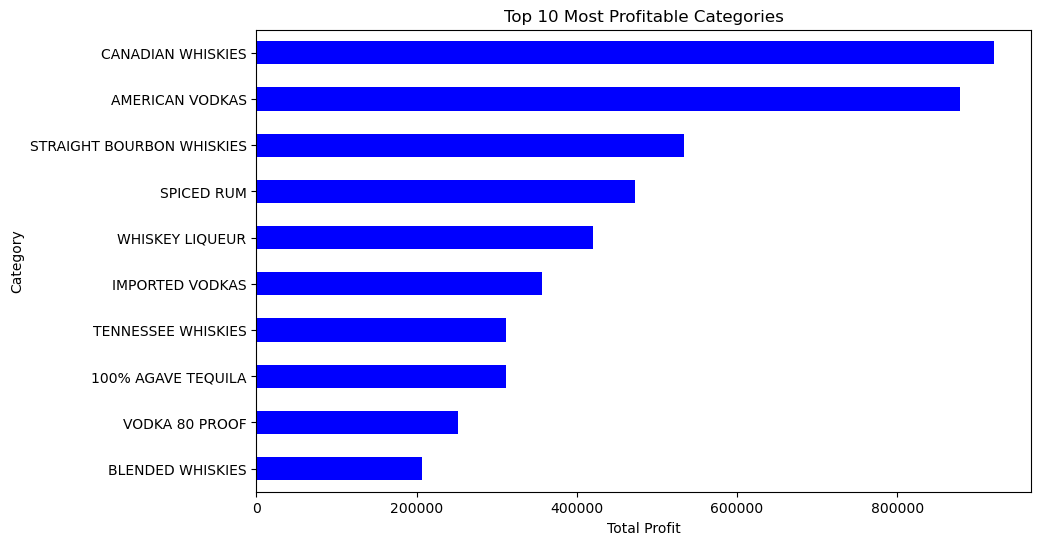

In [86]:
# Plotting most profitable liquors
top10.plot(kind='barh', figsize=(10,6), color='b')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.title('Top 10 Most Profitable Categories')
plt.gca().invert_yaxis()  
plt.show()

#### I choose to omit Question 1 from my submission. The rest are for submission.

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

#### My Answers
- When you try to subtract x and y it gives a ValueError since they have different shapes. 
- When you reshape these arrays, you get a 3x2 array. 
- Reshaping x and y this way returns a 2x3 array.
- (see below)
- x.reshape(-1,1) turns x from a numpy array into a 2D column vector that's 3x1. x.reshape(1,-1) turns the simple list of numbers / 1D array into a 2d vector that's 1x3.

In [3]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

# pt. 1
# x - y

# pt. 2
a = x.reshape(-1,1) - y.reshape(1,-1)
#print(a)

# pt. 3
b = x.reshape(1,-1) - y.reshape(-1,1)
#print(b)

# pt. 4
empty1 = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        empty1[i,j] = x[i] - y[j]
#print(empty1)

empty2 = np.zeros((len(y), len(x)))
for j in range(len(y)):
    for i in range(len(x)):
        empty2[j, i] = x[i] - y[j]
#print(empty2)

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

#### My Answers

- See below.
- Since:
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
multiplying both sides by -1 makes this:
$$
-\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
-1, &x \le z
\end{cases}
$$
Then we add 1 to both sides:
$$
-\mathbb{I}\{x \le z\}+1 = \begin{cases}
0+1, &x > z \\
-1+1, &x \le z
\end{cases}
$$
which ends up looking like:
$$
1-\mathbb{I}\{x \le z\} = \begin{cases}
1, &x > z \\
0, &x \le z
\end{cases}
$$
- If the probability of x <= z is P(x<=z), then the probability of x>z is 1 - P(x<=z), and here we see that is true.
- See below.
- As the sample size N increases, the ECDF will 'smooth out', since when it's small you can observe the discrete number of steps it takes, but as the number gets bigger it's harder to discern the smaller steps.

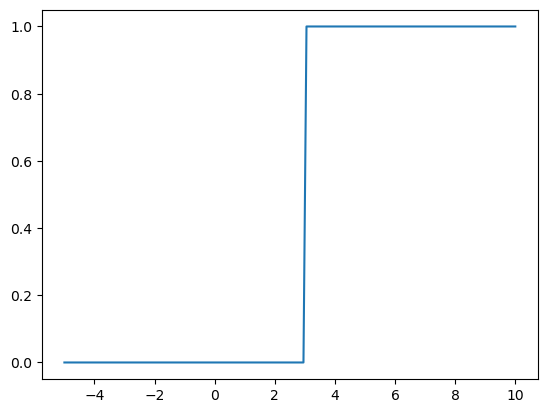

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

z = np.linspace(-5, 10, 150)
x = 3
I = (x <= z)

plt.plot(z, I)

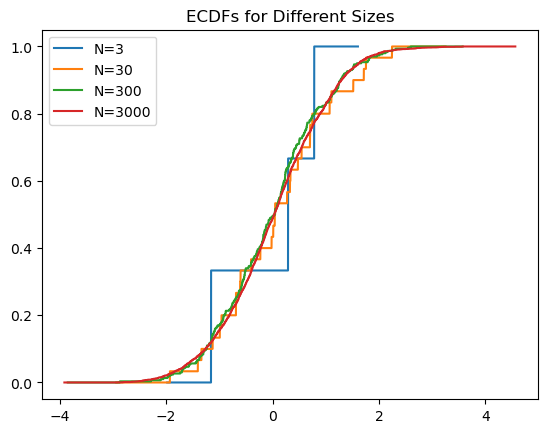

In [50]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def compute_ecdf(X, plot):
    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 17000) # Makes a grid of x-ticks
    ecdf = 0*grid.copy() # Create a space for values

    for i in range(len(X)):
        F_i = X[i] <= grid # Compute the ecdf
        ecdf += F_i

    ecdf = ecdf/len(X)
    if plot == True:
        plt.plot(grid, ecdf, label=f'N={N}')
        plt.legend()
        plt.title('ECDFs for Different Sizes')

    return ecdf, grid

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    compute_ecdf(X, plot=True)

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

### My Answers:
- (See all functions below)

[8.71361172]
[13.01572484]
[19.98105083]
count    159904.000000
mean         16.480350
std          17.099067
min           0.000000
25%           8.670000
50%          12.990000
75%          19.920000
max        3448.260000
Name: State Bottle Retail, dtype: float64


<Axes: xlabel='State Bottle Retail'>

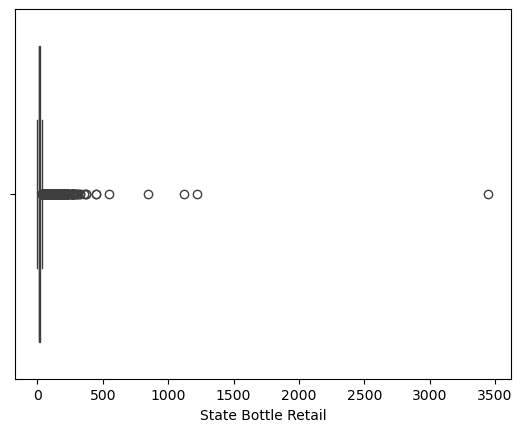

In [63]:
# Data I'm using
df1 = pd.read_csv('./data/iowa.csv')
X = df1['State Bottle Retail']

ecdf, grid = compute_ecdf(X, plot=False)

# 1) Function to compute quantile
def compute_quantile(quantile, F_hat, grid):
    dist = (F_hat - quantile) ** 2
    meds = np.where(dist == dist.min())
    print(grid[meds])
    median = np.mean(grid[meds])
    return median

# 2) Function to compute IQR
def quantile(q, X):
    F_hat, grid = compute_ecdf(X, plot=False)
    return compute_quantile(q, F_hat, grid)

def iqr_and_whiskers(X, whisker_coef=1.5):
    q1 = quantile(0.25, X)
    q2 = quantile(0.50, X)
    q3 = quantile(0.75, X)
    iqr = q3 - q1
    low = q1 - whisker_coef * iqr
    high = q3 + whisker_coef * iqr
    return {"Q1": q1, "Median": q2, "Q3": q3, "IQR": iqr,
            "WhiskerLow": low, "WhiskerHigh": high}

# 3) Function to compute five number summary
def five_number_summary(X):
    if X.size == 0:
        return {"Min": float("nan"), "Q1": float("nan"),
                "Median": float("nan"), "Q3": float("nan"),
                "Max": float("nan")}
    return {
        "Min": float(X.min()),
        "Q1": quantile(0.25, X),
        "Median": quantile(0.50, X),
        "Q3": quantile(0.75, X),
        "Max": float(X.max()),
    }

# 4) Function to compute outliers
def outliers_mask(X, whisker_coef=1.5):
    w = iqr_and_whiskers(X, whisker_coef)
    low, high = w["WhiskerLow"], w["WhiskerHigh"]
    return (X < low) | (X > high)

# Part 5
five_number_summary(X)
q = X.describe()
print(q)
sns.boxplot(x=X)

# My quartiles are off by a few hundredths, but otherwise pretty good. 
# For some reason the boxplot looks a bit funky so it's not great for comparison.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?